In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def D(p1,p2):
    if p1 < p2:
        return 1-p1

    elif p1 == p2:
        return 0.5*(1-p1)
    else:
        return 0

def pi(p1,p2):
    return D(p1,p2)*p1

#p range
P =  [0,1/6, 2/6, 3/6, 4/6, 5/6, 6/6]


#initiate parameters
T = 100
alpha = 0.3
delta = 0.95


#find me the max value of a column in Q1 (tool for Q_update)
def max_column(Q, column):
    max_value = max(Q[P][column] for P in Q)  # Find the max value
    return max_value


def Q_update(Q, p, s, new_s):
    prev = Q[p][s]
    new = pi(p, s) + delta*pi(p, new_s) + delta**2 * max_column(Q, new_s)
    Q[p][s] = (1-alpha)*prev + alpha*new

theta = 1 - np.exp((2 * np.log(0.001)) / 500000)

def epsilon (t):
    return (1-theta)**t

def exploit_explore (Q,t,s):
    if np.random.rand() < epsilon(t):
        #return a random element from p
        return np.random.choice(P)
    else:
        # Exploitation: return action with highest Q-value
        q_values = {a: Q[a][s] for a in P}
        max_q = max(q_values.values())
        best_actions = [a for a in q_values if q_values[a] == max_q]
        return np.random.choice(best_actions)

#define the random choices for both players in t=1 and t=2
a,b=np.random.choice(P),np.random.choice(P)
c,d=np.random.choice(P),np.random.choice(P)

#define price history array (containing 2 random choices each)
p1 = [a,b]
p2 = [c,d]

# make a dictionary for the q-tables
Q1 = {i: {j: 0 for j in P} for i in P}
Q2 = {i: {j: 0 for j in P} for i in P}
print(Q1)

#make a profit history list for both players (for plot purposes)
profit1 =[pi(a,c),pi(b,d)]
profit2 =[pi(c,a),pi(d,b)]

#loop time
T=300000

def q_learning_simulationde(Q1, Q2, p1, p2, profit1, profit2, T):
    i = 1
    t=2
    theta = 1 - np.exp((2 * np.log(0.001)) / 500000)

    while t!=T:
        if i == 1: #player 1's turn
            #update based on lag 1 and 2
            Q_update(Q1,p1[t-2],p2[t-2],p2[t-1])

            #new prices
            p1_new=exploit_explore(Q1,t,p2[t-1])
            p2_new=p2[t-1]

            #append new prices
            p1.append(p1_new)
            p2.append(p2_new)

            #append profits (for plot)
            profit1.append(pi(p1_new,p2_new))
            profit2.append(pi(p2_new,p1_new))
            t=t+1
            i=2

        else: # player 2's turn
            Q_update(Q2,p2[t-2],p1[t-2],p1[t-1])

            #new prices
            p2_new=exploit_explore(Q2,t,p1[t-1])
            p1_new=p1[t-1]

            #append new prices
            p2.append(p2_new)
            p1.append(p1_new)

            #append profits (for plot)
            profit2.append(pi(p2_new,p1_new))
            profit1.append(pi(p1_new,p2_new))

            t=t+1
            i=1

np.random.seed(12099999)
q_learning_simulationde(Q1, Q2, p1, p2, profit1, profit2,T)

{0: {0: 0, 0.16666666666666666: 0, 0.3333333333333333: 0, 0.5: 0, 0.6666666666666666: 0, 0.8333333333333334: 0, 1.0: 0}, 0.16666666666666666: {0: 0, 0.16666666666666666: 0, 0.3333333333333333: 0, 0.5: 0, 0.6666666666666666: 0, 0.8333333333333334: 0, 1.0: 0}, 0.3333333333333333: {0: 0, 0.16666666666666666: 0, 0.3333333333333333: 0, 0.5: 0, 0.6666666666666666: 0, 0.8333333333333334: 0, 1.0: 0}, 0.5: {0: 0, 0.16666666666666666: 0, 0.3333333333333333: 0, 0.5: 0, 0.6666666666666666: 0, 0.8333333333333334: 0, 1.0: 0}, 0.6666666666666666: {0: 0, 0.16666666666666666: 0, 0.3333333333333333: 0, 0.5: 0, 0.6666666666666666: 0, 0.8333333333333334: 0, 1.0: 0}, 0.8333333333333334: {0: 0, 0.16666666666666666: 0, 0.3333333333333333: 0, 0.5: 0, 0.6666666666666666: 0, 0.8333333333333334: 0, 1.0: 0}, 1.0: {0: 0, 0.16666666666666666: 0, 0.3333333333333333: 0, 0.5: 0, 0.6666666666666666: 0, 0.8333333333333334: 0, 1.0: 0}}


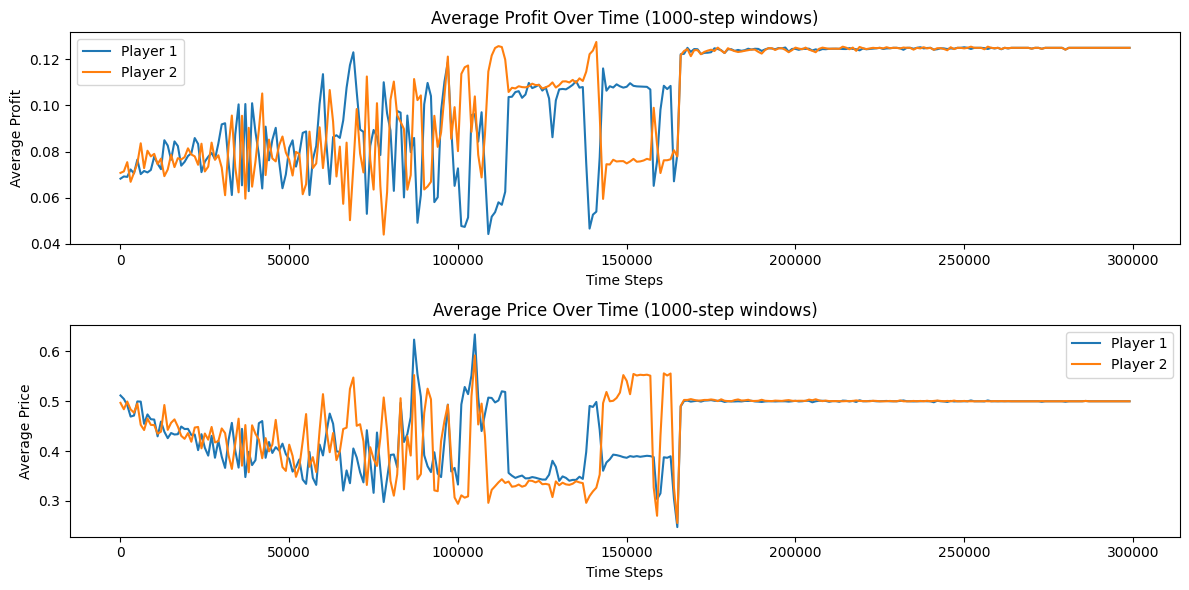

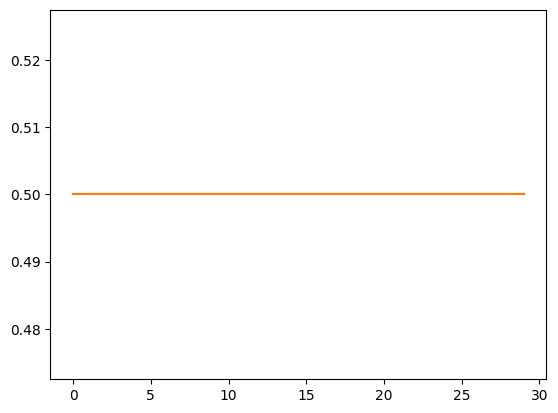

In [ ]:

#make a plot profit and prices for both player
# Calculate moving averages for every 1000 steps
window_size = 1000

# Calculate average profits
avg_profit1 = [np.mean(profit1[i:i+window_size]) for i in range(0, len(profit1), window_size)]
avg_profit2 = [np.mean(profit2[i:i+window_size]) for i in range(0, len(profit2), window_size)]

# Calculate average prices
avg_price1 = [np.mean(p1[i:i+window_size]) for i in range(0, len(p1), window_size)]
avg_price2 = [np.mean(p2[i:i+window_size]) for i in range(0, len(p2), window_size)]

# Create x-axis values (each point represents 1000 steps)
x = np.arange(len(avg_profit1)) * window_size

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot average profits
ax1.plot(x, avg_profit1, label='Player 1')
ax1.plot(x, avg_profit2, label='Player 2')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Average Profit')
ax1.set_title('Average Profit Over Time (1000-step windows)')
ax1.legend()

# Plot average prices
ax2.plot(x, avg_price1, label='Player 1')
ax2.plot(x, avg_price2, label='Player 2')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Average Price')
ax2.set_title('Average Price Over Time (1000-step windows)')
ax2.legend()

plt.tight_layout()
plt.show()

#plot  the last 20 prices for both players
plt.plot(p1[-30:])
plt.plot(p2[-30:])
plt.show()

In [ ]:
import os
from joblib import parallel_backend

# Check the number of available CPU cores
n_cpu = os.cpu_count()

print(f"Number of available CPU cores: {n_cpu}")

# Example usage with joblib's parallel_backend:
# In your simulation, replace this example with your actual parallel computation
with parallel_backend('loky', n_jobs=n_cpu):  # Use all available CPU cores
    # Your parallel computation here
    # Example
    # result = Parallel(n_jobs=n_cpu)(delayed(some_function)(i) for i in range(10))
    print("Running parallel simulation using all available CPU cores.")


Number of available CPU cores: 96
Running parallel simulation using all available CPU cores.


In [ ]:
np.random.seed(1209)
# Store profits for each simulation
profits1 = []
profits2 = []

from joblib import Parallel, delayed
from tqdm import tqdm
from joblib import effective_n_jobs

n_jobs = effective_n_jobs(-1)
print(f"Joblib will use {n_jobs} cores")


def single_simulation():
    t = 2
    T = 500000
    a,b = np.random.choice(P),np.random.choice(P)
    c,d = np.random.choice(P),np.random.choice(P)
    p1 = [a,b]
    p2 = [c,d]
    profit1 = [pi(a,c),pi(b,d)]
    profit2 = [pi(c,a),pi(d,b)]
    Q1 = {i: {j: 0 for j in P} for i in P}
    Q2 = {i: {j: 0 for j in P} for i in P}
    theta = 1 - np.exp((2 * np.log(0.001)) / T)


    # Run Q-learning simulation
    q_learning_simulationde(Q1, Q2, p1, p2, profit1, profit2, T)

    # Get average of last 1000 profits
    avg_profit1 = np.mean(profit1[-1000:])
    avg_profit2 = np.mean(profit2[-1000:])

    return avg_profit1, avg_profit2

# Number of simulations
K = 100


results = Parallel(n_jobs=-1, batch_size=1)(
    delayed(single_simulation)()
    for _ in tqdm(range(K), desc="Running simulations")
)

# Unzip results
profits1, profits2 = zip(*results)


# Create 2D histogram
plt.figure(figsize=(8, 8))
plt.hist2d(profits1, profits2, bins=20, cmap='Blues', range=[[0, 0.15], [0, 0.15]])
plt.colorbar(label='Frequency')
plt.xlabel('Firm 1')
plt.ylabel('Firm 2')
plt.title('Baseline Joint Distribution of Profitability')
plt.xticks(np.linspace(0, 0.15, 16))
plt.yticks(np.linspace(0, 0.15, 16))
plt.tight_layout()
plt.show()


Joblib will use 2 cores


Running simulations:   4%|▍         | 4/100 [01:03<25:23, 15.87s/it]

KeyboardInterrupt: 

Joblib will use 4 cores


Running simulations: 100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


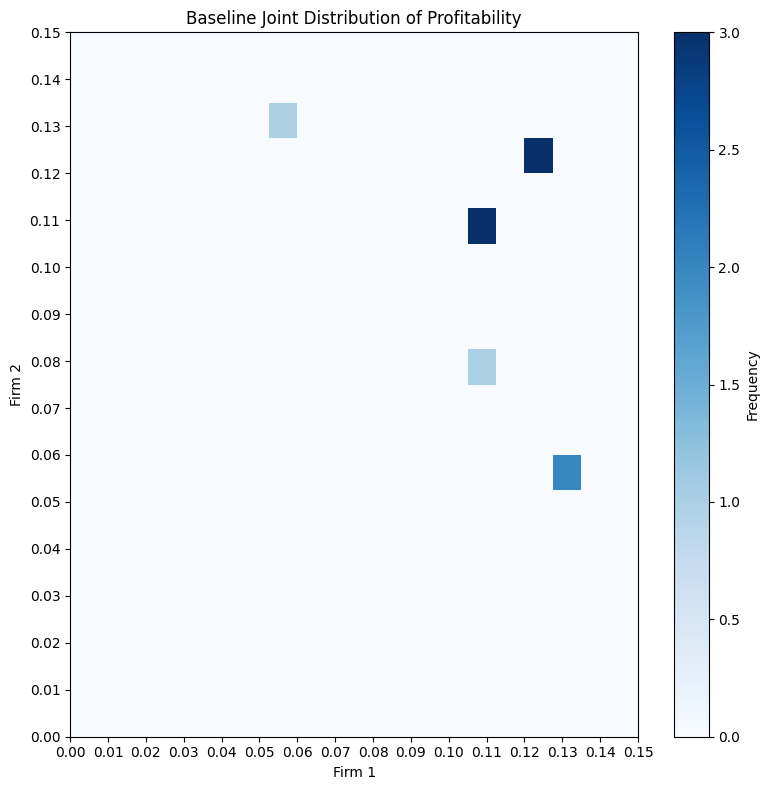


Most common fields (grid position, count):
Field (14, 14): 3.0 simulations
Field (16, 16): 3.0 simulations
Field (17, 7): 2.0 simulations

Price sequences for simulations in top fields:

Simulation 1 in field (16, 16):
Final profits: (0.125, 0.125)
Last 30 prices:
Player 1: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Player 2: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

Simulation 2 in field (16, 16):
Final profits: (0.125, 0.125)
Last 30 prices:
Player 1: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Player 2: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

Simulation

In [ ]:
np.random.seed(1209)
# Store profits for each simulation
profits1 = []
profits2 = []

from joblib import Parallel, delayed
from tqdm import tqdm
from joblib import effective_n_jobs

n_jobs = effective_n_jobs(-1)
print(f"Joblib will use {n_jobs} cores")

def get_grid_position(profit1, profit2, bins=20, range_max=0.15):
    bin_edges = np.linspace(0, range_max, bins + 1)
    x_bin = np.digitize(profit1, bin_edges) - 1
    y_bin = np.digitize(profit2, bin_edges) - 1
    return (x_bin, y_bin)

def single_simulation():
    t = 2
    T = 500000
    a,b = np.random.choice(P),np.random.choice(P)
    c,d = np.random.choice(P),np.random.choice(P)
    p1 = [a,b]
    p2 = [c,d]
    profit1 = [pi(a,c),pi(b,d)]
    profit2 = [pi(c,a),pi(d,b)]
    Q1 = {i: {j: 0 for j in P} for i in P}
    Q2 = {i: {j: 0 for j in P} for i in P}
    theta = 1 - np.exp((2 * np.log(0.001)) / T)

    # Run Q-learning simulation
    q_learning_simulationde(Q1, Q2, p1, p2, profit1, profit2, T)

    # Get average of last 1000 profits
    avg_profit1 = np.mean(profit1[-1000:])
    avg_profit2 = np.mean(profit2[-1000:])

    return avg_profit1, avg_profit2, p1[-30:], p2[-30:]  # Return last 30 prices too

# Number of simulations
K = 10

results = Parallel(n_jobs=-1, batch_size=1)(
    delayed(single_simulation)()
    for _ in tqdm(range(K), desc="Running simulations")
)

# Unzip results
profits1, profits2, prices1, prices2 = zip(*results)

# Create 2D histogram
plt.figure(figsize=(8, 8))
hist, x_edges, y_edges, im = plt.hist2d(profits1, profits2, bins=20, cmap='Blues',
                                       range=[[0, 0.15], [0, 0.15]])
plt.colorbar(label='Frequency')
plt.xlabel('Firm 1')
plt.ylabel('Firm 2')
plt.title('Baseline Joint Distribution of Profitability')
plt.xticks(np.linspace(0, 0.15, 16))
plt.yticks(np.linspace(0, 0.15, 16))
plt.tight_layout()
plt.show()

# Find the most common fields (top 3)
field_counts = []
for i in range(len(hist)):
    for j in range(len(hist[0])):
        if hist[i][j] > 0:  # Only include non-empty fields
            field_counts.append(((i, j), hist[i][j]))

# Sort by count and get top 3
top_fields = sorted(field_counts, key=lambda x: x[1], reverse=True)[:3]
print("\nMost common fields (grid position, count):")
for field, count in top_fields:
    print(f"Field {field}: {count} simulations")

print("\nPrice sequences for simulations in top fields:")
for i, (p1, p2, price1, price2) in enumerate(zip(profits1, profits2, prices1, prices2)):
    x_bin, y_bin = get_grid_position(p1, p2)
    if (y_bin, x_bin) in [field for field, _ in top_fields]:  # Note: y_bin, x_bin order due to hist2d orientation
        print(f"\nSimulation {i} in field ({x_bin}, {y_bin}):")
        print(f"Final profits: ({p1:.3f}, {p2:.3f})")
        print("Last 30 prices:")
        print("Player 1:", [round(p, 3) for p in price1])
        print("Player 2:", [round(p, 3) for p in price2])

CPU times: user 38.2 ms, sys: 13.1 ms, total: 51.3 ms
Wall time: 46.6 ms


<Axes: >

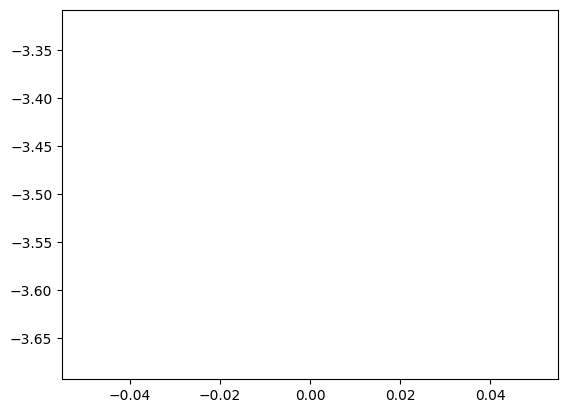

In [ ]:
%%time
def single_simulation(P, delta=0.95, alpha=0.3, T=300000, window_size=1000):
    def max_column(Q, column):
        max_value = max(Q[P][column] for P in Q)
        return max_value


    def Q_update(Q, p, s, new_s):
        prev = Q[p][s]
        new = pi(p, s) + delta*pi(p, new_s) + delta**2 * max_column(Q, new_s)
        Q[p][s] = (1-alpha)*prev + alpha*new

    theta = 1 - np.exp((2 * np.log(0.001)) / 500000)

    def epsilon (t):
        return (1-theta)**t

    def exploit_explore (Q,t,s):
        if np.random.rand() < epsilon(t):

            return np.random.choice(P)
        else:
            q_values = {a: Q[a][s] for a in P}
            max_q = max(q_values.values())
            best_actions = [a for a in q_values if q_values[a] == max_q]
            return np.random.choice(best_actions)

    def D(p1,p2):
        if p1 < p2:
            return 1-p1

        elif p1 == p2:
            return 0.5*(1-p1)
        else:
            return 0

    def pi(p1,p2):
        return D(p1,p2)*p1
    t = 2
    a,b = np.random.choice(P),np.random.choice(P)
    c,d = np.random.choice(P),np.random.choice(P)
    p1 = [a,b]
    p2 = [c,d]
    profit1 = [pi(a,c),pi(b,d)]
    profit2 = [pi(c,a),pi(d,b)]
    Q1 = {a: {s: 0 for s in P} for a in P}
    Q2 = {a: {s: 0 for s in P} for a in P}
    theta = 1 - np.exp((2 * np.log(0.001)) / T)

    def q_learning_simulationde(Q1, Q2, p1, p2, profit1, profit2, T):
        i = 1
        t=2
        theta = 1 - np.exp((2 * np.log(0.001)) / 500000)

        while t!=T:
            if i == 1:
                Q_update(Q1,p1[t-2],p2[t-2],p2[t-1])

                p1_new=exploit_explore(Q1,t,p2[t-1])
                p2_new=p2[t-1]

                p1.append(p1_new)
                p2.append(p2_new)

                profit1.append(pi(p1_new,p2_new))
                profit2.append(pi(p2_new,p1_new))
                t=t+1
                i=2

            else:
                Q_update(Q2,p2[t-2],p1[t-2],p1[t-1])

                p2_new=exploit_explore(Q2,t,p1[t-1])
                p1_new=p1[t-1]

                p2.append(p2_new)
                p1.append(p1_new)

                profit2.append(pi(p2_new,p1_new))
                profit1.append(pi(p1_new,p2_new))

                t=t+1
                i=1
                print(len(profit1))
                return profit1

    p = q_learning_simulationde(Q1, Q2, p1, p2, profit1, profit2, T)

    avg_profit1 = [np.mean(p[i:i+window_size]) for i in range(0, len(p), window_size)]
    print(len(avg_profit1))
    return avg_profit1


price = np.linspace(0, 6, 7)
# Number of simulations
K = 2


results = Parallel(n_jobs=-1, batch_size=1)(
    delayed(single_simulation)(price)
    for _ in range(K)
)

df = pd.DataFrame(results)
df2 = df.mean()
df2.plot(kind="line")



In [ ]:
df.describe()

,0
count,2.000000
mean,-2.750000
std,3.889087
min,-5.500000
25%,-4.125000
50%,-2.750000
75%,-1.375000
max,0.000000


In [2]:
%%time
def single_simulation(P, delta=0.95, alpha=0.3, T=300000, window_size=1000):
    def max_column(Q, column):
        max_value = max(Q[P][column] for P in Q)
        return max_value


    def Q_update(Q, p, s, new_s):
        prev = Q[p][s]
        new = pi(p, s) + delta*pi(p, new_s) + delta**2 * max_column(Q, new_s)
        Q[p][s] = (1-alpha)*prev + alpha*new
        return Q

    theta = 1 - np.exp((2 * np.log(0.001)) / 500000)

    def epsilon (t):
        return (1-theta)**t

    def exploit_explore (Q,t,s):
        if np.random.rand() < epsilon(t):

            return np.random.choice(P)
        else:
            q_values = {a: Q[a][s] for a in P}
            max_q = max(q_values.values())
            best_actions = [a for a in q_values if q_values[a] == max_q]
            return np.random.choice(best_actions)

    def D(p1,p2):
        if p1 < p2:
            return 1-p1
        elif p1 == p2:
            return 0.5*(1-p1)
        else:
            return 0

    def pi(p1,p2):
          return D(p1,p2)*p1

    a,b = np.random.choice(P),np.random.choice(P)
    c,d = np.random.choice(P),np.random.choice(P)
    p1 = [a,b]
    p2 = [c,d]
    profit1 = [pi(a,c),pi(b,d)]
    profit2 = [pi(c,a),pi(d,b)]
    Q1 = {a: {s: 0 for s in P} for a in P}
    Q2 = {a: {s: 0 for s in P} for a in P}
    theta = 1 - np.exp((2 * np.log(0.001)) / T)

    def q_learning_simulationde(Q1, Q2, p1, p2, profit1, profit2, T):
        i = 1
        t=2

        while t!=T:
            if i == 1:
                Q1 = Q_update(Q1,p1[t-2],p2[t-2],p2[t-1])

                p1_new=exploit_explore(Q1,t,p2[t-1])
                p2_new=p2[t-1]

                p1.append(p1_new)
                p2.append(p2_new)

                profit1.append(pi(p1_new,p2_new))
                profit2.append(pi(p2_new,p1_new))
                t=t+1
                i=2

            else:
                Q2 = Q_update(Q2,p2[t-2],p1[t-2],p1[t-1])

                p2_new=exploit_explore(Q2,t,p1[t-1])
                p1_new=p1[t-1]

                p2.append(p2_new)
                p1.append(p1_new)

                profit2.append(pi(p2_new,p1_new))
                profit1.append(pi(p1_new,p2_new))

                t=t+1
                i=1

        return profit1

    p = q_learning_simulationde(Q1, Q2, p1, p2, profit1, profit2, T)

    avg_profit1 = [np.mean(p[i:i+window_size]) for i in range(0, len(p), window_size)]
    return avg_profit1


P =  [0, 1/6, 2/6, 3/6, 4/6, 5/6, 6/6]
# Number of simulations
K = 10
results = Parallel(n_jobs=-1, batch_size="auto")(
    delayed(single_simulation)(P)
    for _ in range(K)
)

CPU times: user 98 ms, sys: 94.1 ms, total: 192 ms
Wall time: 19.1 s


<Axes: >

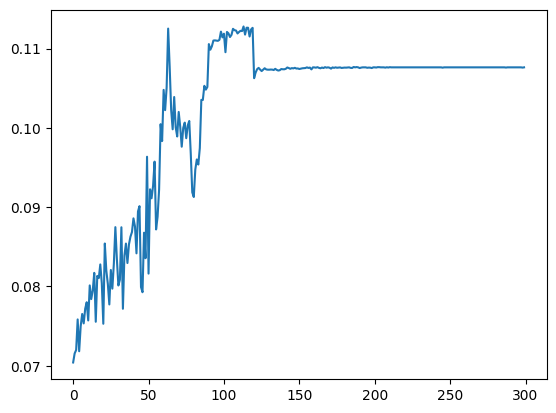

In [3]:
df = pd.DataFrame(results)
df2 = df.mean()
df2.plot(kind="line")

## 1000 runs
CPU times: user 8.15 s, sys: 2.43 s, total: 10.6 s
Wall time: 25min 25s

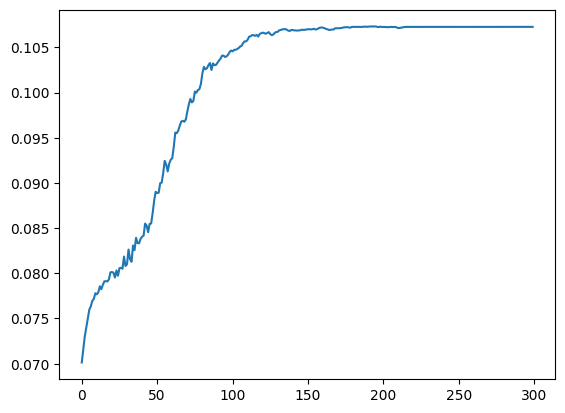

### Predatory Pricing

med  arrays


In [ ]:

np.random.seed(12099)
def D(p1,p2):
    if p1 < p2:
        return 1-p1
    #if the prices are the same
    elif p1 - p2 < 0.001:
        return 0.5*(1-p1)
    else: #p1 > p2
        return 0


def pi(p1,p2):
    return D(p1,p2)*p1

#p range
P =  np.array([0,1/6, 2/6, 3/6, 4/6, 5/6, 6/6])
#p range as indices
P_i = np.arange(len(P))


#initiate parameters
T = 100
alpha = 0.3
delta = 0.95

#find me the max value of a column in Q1 (tool for Q_update)
def max_column(Q, column):
    return np.max(Q[:,column])

#Q_update(Q,p_i,s_i,new_s_i)
def Q_update(Q, p_i, s_i, new_s_i):
    prev = Q[p_i][s_i]
    new = pi(P[p_i], P[s_i]) + delta*pi(P[p_i], P[new_s_i]) + delta**2 * max_column(Q, new_s_i)
    Q[p_i][s_i] = (1-alpha)*prev + alpha*new

theta = 1 - np.exp((2 * np.log(0.001)) / 500000)

def epsilon (t):
    return (1-theta)**t

def exploit_explore(Q, t, s):
    if np.random.rand() < epsilon(t):
        # Exploration: random choice
        return np.random.choice(P_i)
    else:
        # Exploitation: find all actions with max Q-value
        column = Q[:, s]  #define the column in question
        max_value = np.max(column) #find the max value in the column
        best_indices = np.where(column == max_value)[0]  # Get indices of all max values
        chosen_index = np.random.choice(best_indices)  # Randomly choose among best
        return chosen_index  # Return the actual price



#LOOPTIME
#define the random choices for both players in t=1 and t=2
a,b=np.random.choice(P_i),np.random.choice(P_i)
c,d=np.random.choice(P_i),np.random.choice(P_i)
#define price history array (containing 2 random choices each)
p1 = [a,b]
p2 = [c,d]
#make a profit history list for both players (for plot purposes)
profit1 =[pi(P[a],P[c]),pi(P[b],P[d])]
profit2 =[pi(P[c],P[a]),pi(P[d],P[b])]
#loop time
T=300000

i,j=1,2
t=2
theta = 1 - np.exp((2 * np.log(0.001)) / 500000)
Q1 = np.zeros((len(P), len(P)))
Q2 = np.zeros((len(P), len(P)))
#fill Q3 with random values between 1 and 10

while t!=T:
    if i == 1: #player 1's turn
        #update based on lag 1 and 2
        Q_update(Q1,p1[t-2],p2[t-2],p2[t-1])

        #new prices
        p1_new=exploit_explore(Q1,t,p2[t-1])
        p2_new=p2[t-1]

        #append new prices
        p1.append(p1_new)
        p2.append(p2_new)

        #append profits (for plot)
        profit1.append(pi(P[p1_new],P[p2_new]))
        profit2.append(pi(P[p2_new],P[p1_new]))

        t=t+1
        i,j=j,i #swap 1 and 2

    else: # player 2's turn
        Q_update(Q2,p2[t-2],p1[t-2],p1[t-1])

        #new prices
        p2_new=exploit_explore(Q2,t,p1[t-1])
        p1_new=p1[t-1]

        #append new prices
        p2.append(p2_new)
        p1.append(p1_new)

        #append profits (for plot)
        profit2.append(pi(P[p2_new],P[p1_new]))
        profit1.append(pi(P[p1_new],P[p2_new]))

        t=t+1
        i,j=j,i

#make a plot profit and prices for both player
# Calculate moving averages for every 1000 steps
window_size = 1000

# Calculate average profits
avg_profit1 = [np.mean(profit1[i:i+window_size]) for i in range(0, len(profit1), window_size)]
avg_profit2 = [np.mean(profit2[i:i+window_size]) for i in range(0, len(profit2), window_size)]

# Calculate average prices
avg_price1 = [np.mean(p1[i:i+window_size]) for i in range(0, len(p1), window_size)]
avg_price2 = [np.mean(p2[i:i+window_size]) for i in range(0, len(p2), window_size)]

# Create x-axis values (each point represents 1000 steps)
x = np.arange(len(avg_profit1)) * window_size

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot average profits
ax1.plot(x, avg_profit1, label='Player 1')
ax1.plot(x, avg_profit2, label='Player 2')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Average Profit')
ax1.set_title('Average Profit Over Time (1000-step windows)')
ax1.legend()

# Plot average prices
ax2.plot(x, avg_price1, label='Player 1')
ax2.plot(x, avg_price2, label='Player 2')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Average Price')
ax2.set_title('Average Price Over Time (1000-step windows)')
ax2.legend()

plt.tight_layout()
plt.show()

#plot  the last 20 prices for both players
plt.plot(p1[-30:])
plt.plot(p2[-30:])
plt.show()